<a href="https://www.kaggle.com/code/swapanroy/fine-tuning-a-gemma-model-with-lora-for-hindi-eng?scriptVersionId=223302407" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Fine-Tuning the Gemma2_instruct_2b_en Model with LoRA for Hindi-English Translation

(Low-Rank Adaptation)

## Install dependent libraries 

In [1]:
!pip install -q -U keras-nlp datasets
!pip install -q -U keras
print("Installation Complete")

Installation Complete


In [1]:
import keras
import keras_nlp
import os

# Set the backend to JAX for efficient tensor computations
os.environ["KERAS_BACKEND"] = "jax"
# Allocate 95% of available memory to JAX to avoid fragmentation
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.95"

#KerasNLP is a natural language processing library that works natively with JAX

import keras_nlp
import keras

# Configure Keras to use half-precision floating-point numbers (bfloat16)
# for faster training and reduced memory usage
# keras.config.set_floatx("bfloat16")

# Training hyperparameters
token_limit = 254  # Maximum sequence length
num_data_limit = 100  # Number of training examples
lora_name = "Roy"  # Name of the LoRA model
lora_rank = 4  # Rank of the LoRA model
lr_value = 1e-4  # Learning rate
train_epoch = 20  # Number of training epochs
#model_id = "gemma2_instruct_2b_en"  # Base model ID; 

### LOAD Model

In [1]:

import time

# Import the GemmaCausalLM model from KerasNLP
#gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset(model_id)
gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset('gemma2_instruct_2b_en')

# Print a summary of the model's architecture
gemma_lm.summary()

# Initialize a variable to track the start time
tick_start = 0

# Function to start, stop and print the timer
def tick():
    global tick_start
    tick_start = time.time()

def tock():
    print(f"TOTAL TIME ELAPSED: {time.time() - tick_start:.2f}s")

def text_gen(prompt):
    tick()
    input = f"<start_of_turn>user\n{prompt}<end_of_turn>\n<start_of_turn>model\n"
    output = gemma_lm.generate(input, max_length=token_limit)
    print("\nGemma output:")
    print(output)
    tock()

# inference before fine-tuning

# Generate text for the first prompt
text_gen("Do you know Hindi language?")

# Generate text for the second prompt (in Hindi)
text_gen("क्या आप हिंदी भाषा जानते हैं?")

normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                              │                      Vocab size: 256,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2304)        │   2,614,341,888 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     589,824,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,614,341,888 (9.74 GB)

 Trainable params: 2,614,341,888 (9.74 GB)

 Non-trainable params: 0 (0.00 B)

I0000 00:00:1739936629.171297      30 service.cc:145] XLA service 0x5cf9a503fca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739936629.171352      30 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1739936642.869505      30 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Gemma output:
<start_of_turn>user
Do you know Hindi language?<end_of_turn>
<start_of_turn>model
As an AI, I don't "know" languages in the way a human does. I can't speak or understand Hindi in the same way you do. 

However, I have been trained on a massive dataset of text and code, which includes a significant amount of Hindi. This means I can:

* **Translate** Hindi to English and vice versa.
* **Generate** text in Hindi, like writing simple sentences or stories.
* **Identify** Hindi words and phrases.
* **Answer** questions about Hindi grammar and vocabulary.

So, while I don't "know" Hindi in a human sense, I can still be helpful with it! 

How can I help you with Hindi today? 😊 
<end_of_turn>
TOTAL TIME ELAPSED: 28.40s

Gemma output:
<start_of_turn>user
क्या आप हिंदी भाषा जानते हैं?<end_of_turn>
<start_of_turn>model
हाँ, मैं हिंदी भाषा जानता हूँ! 😊  

आप मुझसे हिंदी में बात कर सकते हैं। आप मुझे क्या पूछना चाहते हैं? 
<end_of_turn>
TOTAL TIME ELAPSED: 1.36s


In [2]:
import keras
import keras_nlp
import datasets

# Load a pre-trained Gemma tokenizer

tokenizer = keras_nlp.models.GemmaTokenizer.from_preset("gemma2_instruct_2b_en")

## Load the Hindi-English translation dataset, this is they key to how good our model will work
from datasets import load_dataset
ds = load_dataset(
    "/kaggle/input/iit-b-hindi/",
    split="train",
)
print(ds)
data = ds.with_format("np", columns=["hindi", "english"], output_all_columns=False)
train = []
for x in data:
  item = f"<start_of_turn>user\nनिचले पटल के लिए डिफोल्ट प्लग-इन खाका.\n\"{x['hindi']}\"<end_of_turn>\n<start_of_turn>model\n{x['english']}<end_of_turn>"
  length = len(tokenizer(item))
  # skip data if the token length is longer than our limit
  if length < token_limit:
    train.append(item)
    if(len(train)>=num_data_limit):
      break

# Print the number of training examples and the first few examples
print(len(train))
print(train[0])
print(train[1])
print(train[2])


Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['hindi', 'english'],
    num_rows: 1561841
})
100
<start_of_turn>user
निचले पटल के लिए डिफोल्ट प्लग-इन खाका.
"अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें"<end_of_turn>
<start_of_turn>model
Give your application an accessibility workout<end_of_turn>
<start_of_turn>user
निचले पटल के लिए डिफोल्ट प्लग-इन खाका.
"एक्सेर्साइसर पहुंचनीयता अन्वेषक"<end_of_turn>
<start_of_turn>model
Accerciser Accessibility Explorer<end_of_turn>
<start_of_turn>user
निचले पटल के लिए डिफोल्ट प्लग-इन खाका.
"निचले पटल के लिए डिफोल्ट प्लग-इन खाका"<end_of_turn>
<start_of_turn>model
The default plugin layout for the bottom panel<end_of_turn>


In [3]:
# Enable LoRA for the model and set the LoRA rank to 4.
gemma_lm.backbone.enable_lora(rank=lora_rank)

# Print a summary of the model, including LoRA parameters
gemma_lm.summary()

# Limit the input sequence length (to control memory usage).
gemma_lm.preprocessor.sequence_length = token_limit

# Configure the AdamW optimizer with weight decay
optimizer = keras.optimizers.AdamW(
    learning_rate=lr_value,
    weight_decay=0.01,
)
# Exclude bias and scale parameters from weight decay
optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

# Compile the model with sparse categorical crossentropy loss and AdamW optimizer
gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                              │                      Vocab size: 256,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2304)        │   2,617,270,528 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     589,824,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,617,270,528 (9.75 GB)

 Trainable params: 2,928,640 (11.17 MB)

 Non-trainable params: 2,614,341,888 (9.74 GB)

### Custom callback for Keras that saves LoRA weights and performs basic evaluation after each training epoch.

Epoch 1/20


W0000 00:00:1739936797.472002      91 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1739936818.062717      91 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_9', 436 bytes spill stores, 508 bytes spill loads
ptxas warning : Registers are spilled to local memory in function '__cuda_sm3x_div_rn_noftz_f32_slowpath', 24 bytes spill stores, 24 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_7', 68 bytes spill stores, 116 bytes spill loads
ptxas warning : Registers are spilled to local memory in function '__cuda_sm3x_div_rn_noftz_f32_slowpath', 12 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 436 bytes spill stores, 508 bytes spill loads
ptxas warning : Register

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - loss: 0.9846 - sparse_categorical_accuracy: 0.2871
Gemma output:
<start_of_turn>user
निचले पटल के लिए डिफोल्ट प्लग-इन खाका<end_of_turn>
<start_of_turn>model
"User"<end_of_turn>
TOTAL TIME ELAPSED: 22.97s
100/100 ━━━━━━━━━━━━━━━━━━━━ 137s 657ms/step - loss: 0.9822 - sparse_categorical_accuracy: 0.2882
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - loss: 0.3413 - sparse_categorical_accuracy: 0.7511
Gemma output:
<start_of_turn>user
निचले पटल के लिए डिफोल्ट प्लग-इन खाका<end_of_turn>
<start_of_turn>model
"User"<end_of_turn>
TOTAL TIME ELAPSED: 0.35s
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 428ms/step - loss: 0.3406 - sparse_categorical_accuracy: 0.7515
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - loss: 0.2536 - sparse_categorical_accuracy: 0.7970
Gemma output:
<start_of_turn>user
निचले पटल के लिए डिफोल्ट प्लग-इन खाका<end_of_turn>
<start_of_turn>model
"Type"<end_of_turn>
TOTAL TIME ELAPSED: 0.35s
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 428ms

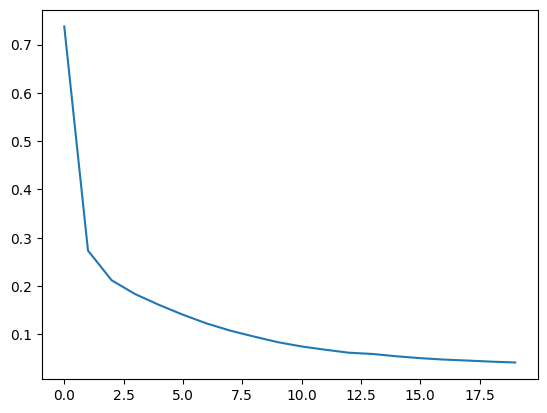

In [4]:
import matplotlib.pyplot as plt

class CustomCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    model_name = f"/kaggle/working/{lora_name}_{lora_rank}_epoch{epoch+1}.lora.h5"
    gemma_lm.backbone.save_lora_weights(model_name)

    # Evaluate
    text_gen("निचले पटल के लिए डिफोल्ट प्लग-इन खाका")

# Train the model with the custom callback
history = gemma_lm.fit(train, epochs=train_epoch, batch_size=1, callbacks=[CustomCallback()])

# Plot training history

plt.plot(history.history['loss'])
plt.show()

In [ ]:
# Example Code for Load LoRA

import os
import keras
import keras_nlp
gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset('gemma2_instruct_2b_en')

# Use the same LoRA rank that you trained, 
# https://keras.io/keras_hub/api/models/gemma/gemma_backbone/#gemmabackbone-class
gemma_lm.backbone.enable_lora(rank=4)

# Load pre-trained LoRA weights
gemma_lm.backbone.load_lora_weights(f"/kaggle/working/Roy_4_epoch20.lora.h5")

### Compile the model with a top-k and top-p sampling strategy and Generate text using the compiled model

#### Influence of Parameter *k* on OutputThe parameter *k* directly controls the diversity of the generated text:


* **Low *k*** (e.g., *k* = 1): With *k* = 1, top-k sampling behaves like greedy decoding, as only the most probable token is selected deterministically, resulting in a predictable and repetitive output.
* **Moderate *k*** (e.g., *k* = 5–10): Small values of *k* introduce moderate randomness by restricting selection to the most probable tokens while maintaining context fidelity. This setting is useful when balanced diversity is desired, as it reduces the likelihood of incoherent or tangential token choices.
* **High *k*** (e.g., *k* > 20): Larger values of *k* allow more diversity, as the model can choose from a broader set of tokens. However, this can also increase the risk of generating less coherent text, as the inclusion of lower-probability tokens may lead to irrelevant or unexpected output.The optimal value of *k* often depends on the specific task and the level of creativity or strictness required in the generated text.


https://dataforest.ai/glossary/top-k-sampling#:~:text=However%2C%20this%20can%20also%20increase,lead%20to%20irrelevant%20or%20unexpected

In [5]:
gemma_lm.compile(sampler="top_k") #default = 50

text_gen("कृपया एक ईमेल उत्तर लिखें:\n\"हैलो, मैं हमारी शादी की सालगिरह के लिए एक केक नंबर 3 ऑर्डर करना चाहूंगा?")
text_gen("कृपया निम्नलिखित के लिए एक ईमेल उत्तर लिखें।\n\"हैलो, मैं हमारी शादी की सालगिरह के लिए एक केक नंबर 3 ऑर्डर करना चाहूंगा। क्या यह संभव है?")


Gemma output:
<start_of_turn>user
कृपया एक ईमेल उत्तर लिखें:
"हैलो, मैं हमारी शादी की सालगिरह के लिए एक केक नंबर 3 ऑर्डर करना चाहूंगा?<end_of_turn>
<start_of_turn>model
Hello! I would like to order a cake number 3 for your wedding anniversary.<end_of_turn>
TOTAL TIME ELAPSED: 28.51s

Gemma output:
<start_of_turn>user
कृपया निम्नलिखित के लिए एक ईमेल उत्तर लिखें।
"हैलो, मैं हमारी शादी की सालगिरह के लिए एक केक नंबर 3 ऑर्डर करना चाहूंगा। क्या यह संभव है?<end_of_turn>
<start_of_turn>model
नमस्ते!

आज आप अपनी शादी के लिए एक केक की पंक्तियों को 3 ऑर्डर करना चाहते हैं, तो यह संभव है। 🍰🎉 

आपके पसंद के लिए विभिन्न प्रकार के रंगों और सज्जनों की पंक्तियों की पंक्तियों की पंक्तियां चुनें।<end_of_turn>
TOTAL TIME ELAPSED: 3.07s


In [6]:
gemma_lm.compile(sampler="top_k") #default = 50

text_gen("कृपया एक ईमेल उत्तर लिखें:\n\"हैलो, मैं हमारी शादी की सालगिरह के लिए एक केक नंबर 3 ऑर्डर करना चाहूंगा?")
text_gen("कृपया एक ईमेल उत्तर सूची का अनुसरण करें। और 10 लोगों के लिए लागत अनुमान पूछें")


Gemma output:
<start_of_turn>user
कृपया एक ईमेल उत्तर लिखें:
"हैलो, मैं हमारी शादी की सालगिरह के लिए एक केक नंबर 3 ऑर्डर करना चाहूंगा?<end_of_turn>
<start_of_turn>model
Hello! I would like to order a cake number for the wedding anniversary.<end_of_turn>
TOTAL TIME ELAPSED: 26.32s

Gemma output:
<start_of_turn>user
कृपया एक ईमेल उत्तर सूची का अनुसरण करें। और 10 लोगों के लिए लागत अनुमान पूछें<end_of_turn>
<start_of_turn>model
विभिन्न उत्तरों के लिए खाका. पंक्ति में 10 लोगों के लिए लागत निगाह मिटाओ.<end_of_turn>
TOTAL TIME ELAPSED: 1.33s





https://docs.ai-solutions.ext.hpe.com/products/gen-ai/latest/get-started/glossary/model-params-top-p/#:~:text=Set%20a%20lower%20Top%2DP,to%20more%20likely%2C%20predictable%20words.

In [7]:
gemma_lm.compile(sampler="top_p") #default=1

text_gen("कृपया बेकर को ईमेल करें और सुनिश्चित करें कि वह ब्लैक फॉरेस्ट केक क्या बना सकता है और हमारी शादी की सालगिरह के लिए 4 मोमबत्तियां दे सकता है और लागत")
text_gen("कृपया केक के लिए एक ईमेल उत्तर सूची का अनुसरण करें और 10 लोगों के लिए लागत अनुमान पूछें")
text_gen("कृपया एक ईमेल उत्तर लिखें:\n\"हैलो, मैं हमारी शादी की सालगिरह के लिए एक केक नंबर 3 ऑर्डर करना चाहूंगा?")
text_gen("कृपया केक के लिए एक ईमेल उत्तर सूची का अनुसरण करें और 10 लोगों के लिए लागत अनुमान के बारे में पूछें, कृपया बांग्ला में प्रतिक्रिया के लिए पूछें।")
text_gen("कृपया केक के लिए एक ईमेल उत्तर सूची का अनुसरण करें और 10 लोगों के लिए लागत अनुमान पूछें, कृपया अंग्रेजी में प्रतिक्रिया मांगें")


Gemma output:
<start_of_turn>user
कृपया बेकर को ईमेल करें और सुनिश्चित करें कि वह ब्लैक फॉरेस्ट केक क्या बना सकता है और हमारी शादी की सालगिरह के लिए 4 मोमबत्तियां दे सकता है और लागत<end_of_turn>
<start_of_turn>model
Subject: Cake order for wedding anniversary

Good morning/afternoon, [Baker's name]

I hope this email finds you well.

We'd like to place an order for a cake for our wedding anniversary, which falls on [Date]. 

Could you please tell us what flavours you offer for the Black Forest cake and what the cost would be? We would also appreciate it if you could confirm how many candles you can provide for the cake.

Thank you for your time and we look forward to hearing from you soon.

Best regards,
[Your name]<end_of_turn>
TOTAL TIME ELAPSED: 51.09s

Gemma output:
<start_of_turn>user
कृपया केक के लिए एक ईमेल उत्तर सूची का अनुसरण करें और 10 लोगों के लिए लागत अनुमान पूछें<end_of_turn>
<start_of_turn>model
विभाग के लिए आयोजनाक पटलधामधुंधकधुंधकधुंधकधुंधकधुंधकधुंधकधुंधकधुंधकधुंधकधुंध

In [8]:
gemma_lm.compile(sampler="top_k") #default=1

text_gen("कृपया बेकर को ईमेल करें और सुनिश्चित करें कि वह ब्लैक फॉरेस्ट केक क्या बना सकता है और हमारी शादी की सालगिरह के लिए 4 मोमबत्तियां दे सकता है और लागत")
text_gen("कृपया केक के लिए एक ईमेल उत्तर सूची का अनुसरण करें और 10 लोगों के लिए लागत अनुमान पूछें")
text_gen("कृपया एक ईमेल उत्तर लिखें:\n\"हैलो, मैं हमारी शादी की सालगिरह के लिए एक केक नंबर 3 ऑर्डर करना चाहूंगा?")
text_gen("कृपया केक के लिए एक ईमेल उत्तर सूची का अनुसरण करें और 10 लोगों के लिए लागत अनुमान के बारे में पूछें, कृपया बांग्ला में प्रतिक्रिया के लिए पूछें।")
text_gen("कृपया केक के लिए एक ईमेल उत्तर सूची का अनुसरण करें और 10 लोगों के लिए लागत अनुमान पूछें, कृपया अंग्रेजी में प्रतिक्रिया मांगें")


Gemma output:
<start_of_turn>user
कृपया बेकर को ईमेल करें और सुनिश्चित करें कि वह ब्लैक फॉरेस्ट केक क्या बना सकता है और हमारी शादी की सालगिरह के लिए 4 मोमबत्तियां दे सकता है और लागत<end_of_turn>
<start_of_turn>model
Subject: Chocolate Forest Cake Order - Anniversary Celebration

Good morning, Baker!

We'd like to place an order for a chocolate forest cake for our anniversary celebration. Please let us know what flavours and fillings your bakery offers for this type of cake.

Ideally, we would like a four-tier cake decorated to resemble a forest with moss, trees, and edible animals. Please confirm the availability of this design and the approximate cost.

Thank you for your time and we look forward to hearing from you soon!

Best regards,

[Your Name]<end_of_turn>
TOTAL TIME ELAPSED: 32.21s

Gemma output:
<start_of_turn>user
कृपया केक के लिए एक ईमेल उत्तर सूची का अनुसरण करें और 10 लोगों के लिए लागत अनुमान पूछें<end_of_turn>
<start_of_turn>model
विभाग के लिए आयोजना को 10 लोगों के लिए ला